# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | myanaung
Processing Record 6 of Set 1 | kasane
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | papparappatti
Processing Record 9 of Set 1 | port douglas
Processing Record 10 of Set 1 | pacocha
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | registro
Processing Record 13 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 14 of Set 1 | cable beach
City not found. Skipping...
Processing Record 15 of Set 1 | tocopilla
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | utrik
Pro

City not found. Skipping...
Processing Record 38 of Set 4 | constantia
Processing Record 39 of Set 4 | oranjemund
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | slyudyanka
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | kabinda
Processing Record 44 of Set 4 | porto velho
Processing Record 45 of Set 4 | bikenibeu village
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | hermanus
Processing Record 48 of Set 4 | mil'kovo
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | nouadhibou
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | puerto armuelles
Processing Record 3 of Set 5 | berdychiv
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | hagere maryam
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | chibougamau
Processing Record 8 of Set 5 | west island
Processing Record 9 of Set 5 | fomboni
Processing Record 10 of

Processing Record 30 of Set 8 | bridlington
Processing Record 31 of Set 8 | khandyga
Processing Record 32 of Set 8 | yigo village
Processing Record 33 of Set 8 | breves
Processing Record 34 of Set 8 | kajaani
Processing Record 35 of Set 8 | talacogon
Processing Record 36 of Set 8 | urumqi
Processing Record 37 of Set 8 | chhala
Processing Record 38 of Set 8 | mindelheim
Processing Record 39 of Set 8 | mhamid
Processing Record 40 of Set 8 | kattivakkam
Processing Record 41 of Set 8 | bondo
Processing Record 42 of Set 8 | piti village
Processing Record 43 of Set 8 | dahab
Processing Record 44 of Set 8 | sierra grande
Processing Record 45 of Set 8 | mili
Processing Record 46 of Set 8 | mahdia
Processing Record 47 of Set 8 | jiwani
Processing Record 48 of Set 8 | grand island
Processing Record 49 of Set 8 | caconda
Processing Record 0 of Set 9 | malango
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | nova sintra
Processing Record 3 of Set 9 | konarka
Processing Record 4 

Processing Record 23 of Set 12 | northam
Processing Record 24 of Set 12 | union choco
City not found. Skipping...
Processing Record 25 of Set 12 | juneau
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | berezovyy
Processing Record 28 of Set 12 | taroa
Processing Record 29 of Set 12 | gundlupet
Processing Record 30 of Set 12 | fort st. john
Processing Record 31 of Set 12 | bereznik
Processing Record 32 of Set 12 | bandar
Processing Record 33 of Set 12 | kharp
Processing Record 34 of Set 12 | sargatskoye
Processing Record 35 of Set 12 | rio largo
Processing Record 36 of Set 12 | port saint john's
Processing Record 37 of Set 12 | sahavato
City not found. Skipping...
Processing Record 38 of Set 12 | aral
Processing Record 39 of Set 12 | krasnokholm
Processing Record 40 of Set 12 | shubarkuduk
Processing Record 41 of Set 12 | teguise
Processing Record 42 of Set 12 | nampula
Processing Record 43 of Set 12 | brisas barra de suchiate
Processing Record 44 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,28.44,74,40,6.69,US,1726436337
1,nuuk,64.1835,-51.7216,3.34,100,100,1.03,GL,1726436272
2,port-aux-francais,-49.3500,70.2167,2.39,74,84,13.63,TF,1726436340
3,grytviken,-54.2811,-36.5092,-2.59,75,63,4.25,GS,1726436341
4,myanaung,18.2833,95.3167,23.38,95,100,1.45,MM,1726436342


In [6]:
# before outputing the day converting time to a readable format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.44,74,40,6.69,US,2024-09-15
1,nuuk,64.1835,-51.7216,3.34,100,100,1.03,GL,2024-09-15
2,port-aux-francais,-49.3500,70.2167,2.39,74,84,13.63,TF,2024-09-15
3,grytviken,-54.2811,-36.5092,-2.59,75,63,4.25,GS,2024-09-15
4,myanaung,18.2833,95.3167,23.38,95,100,1.45,MM,2024-09-15


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

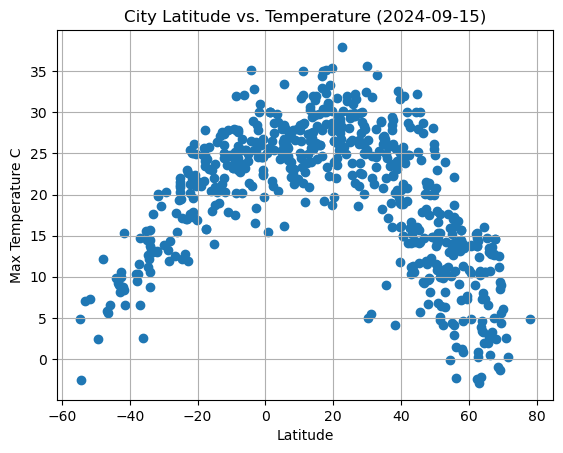

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

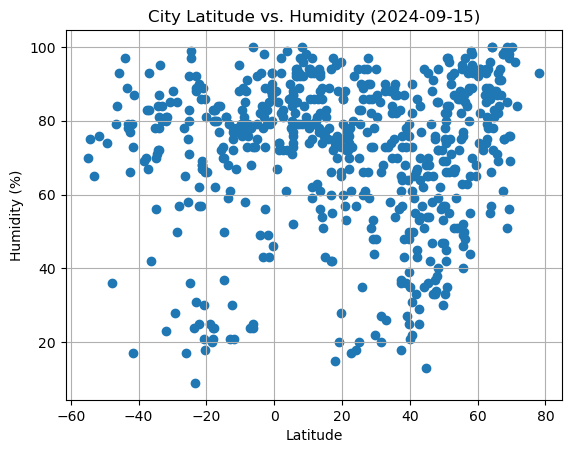

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

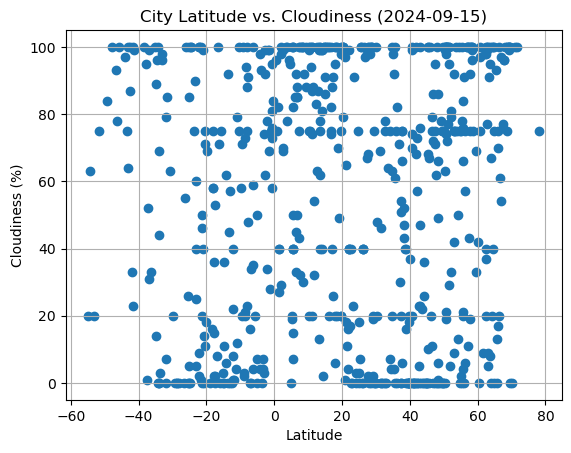

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

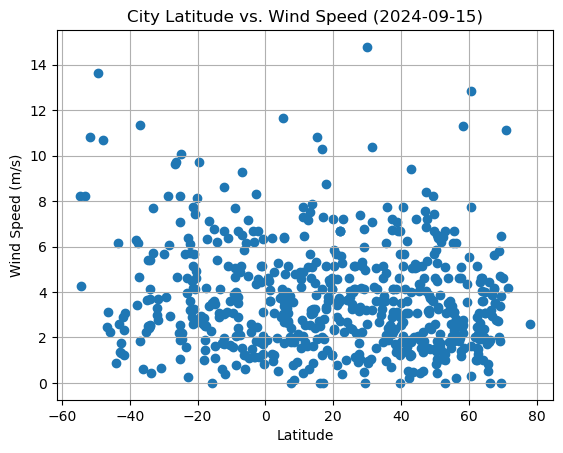

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.44,74,40,6.69,US,2024-09-15
1,nuuk,64.1835,-51.7216,3.34,100,100,1.03,GL,2024-09-15
4,myanaung,18.2833,95.3167,23.38,95,100,1.45,MM,2024-09-15
7,papparappatti,12.2167,78.0667,23.78,80,83,1.64,IN,2024-09-15
10,bethel,41.3712,-73.4140,24.77,65,0,3.09,US,2024-09-15


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.39,74,84,13.63,TF,2024-09-15
3,grytviken,-54.2811,-36.5092,-2.59,75,63,4.25,GS,2024-09-15
5,kasane,-17.8167,25.1500,23.46,24,2,2.49,BW,2024-09-15
6,atafu village,-8.5421,-172.5159,27.86,77,21,3.98,TK,2024-09-15
8,port douglas,-16.4833,145.4667,23.06,84,100,7.13,AU,2024-09-15


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7516177249321617


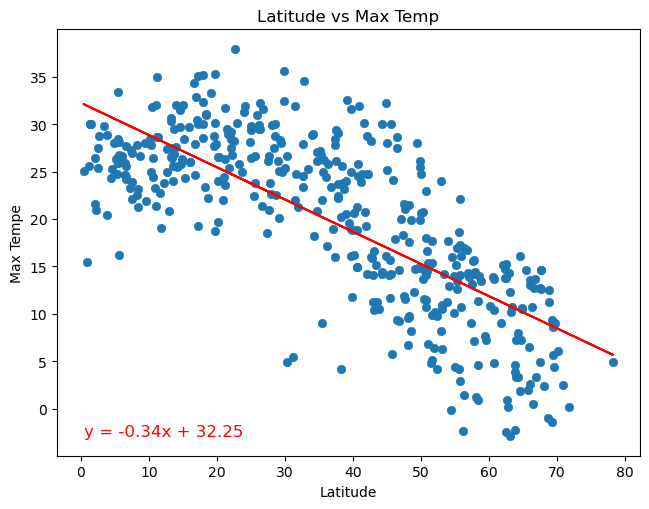

In [15]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")
plt.title(f"Latitude vs Max Temp")
plt.show()

The r-value is: 0.846163438523002


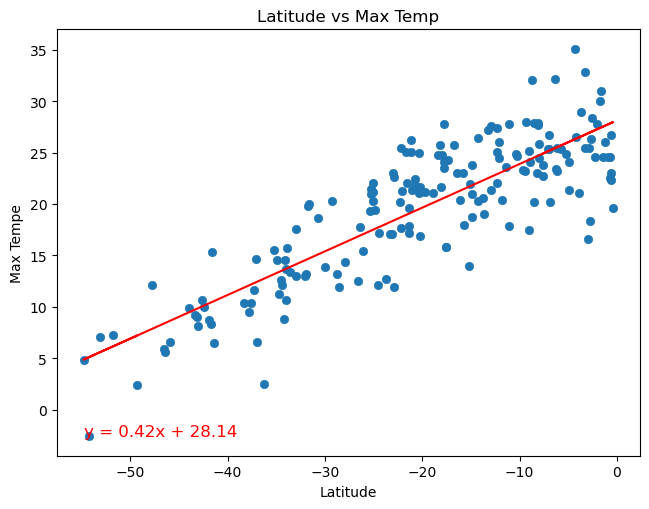

In [16]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")
plt.title(f"Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** 

There is a strong relationship between latitude and maximum temperature. 

- There's a strong correlation between the distance from the equator and the Max Temperature. Maximum Temperature increases as we approach the equator.
- The northern hemisphere has a strong negative correlation
- The southern hemisphere has a strong positive correlation


### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.033895208422564785


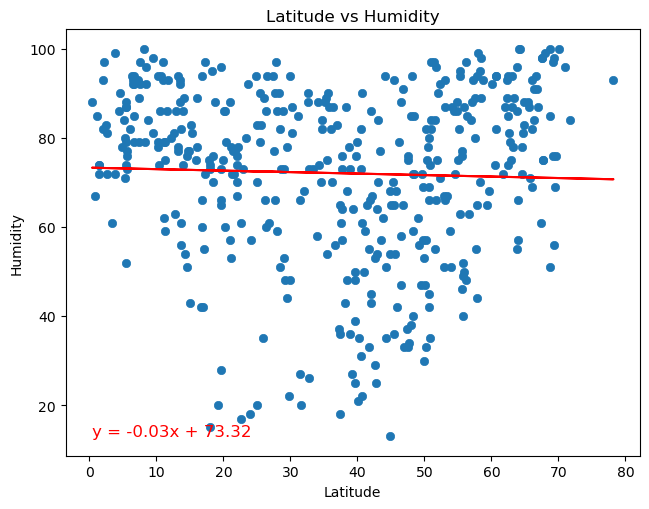

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity")
plt.show()

The r-value is: 0.010568833163009297


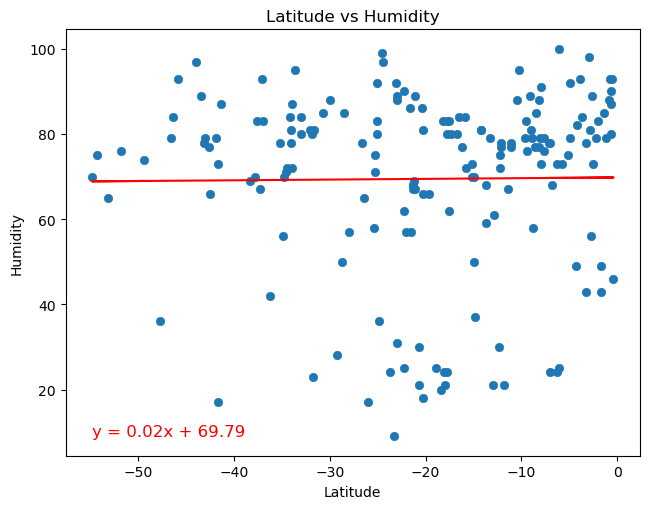

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** 

There's little correlation between Latitude and Humidity, you can clearly see that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels more than 60%.

The scatter points show that the data is too spread which indicates that there are very 
little reliable correlation between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04655344009025294


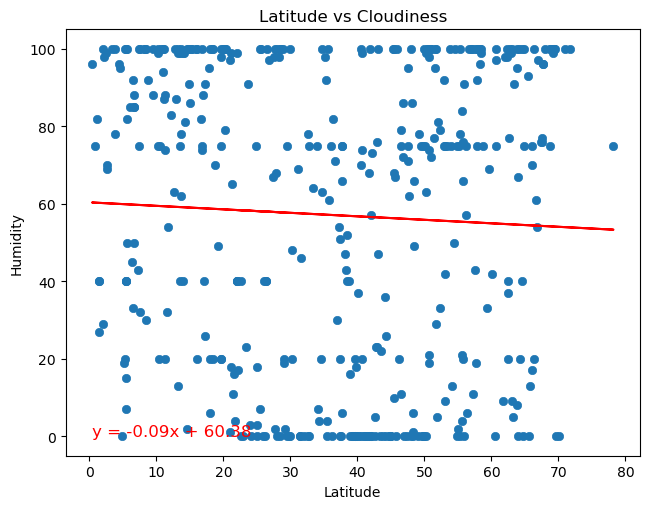

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Cloudiness")
plt.show()

The r-value is: -0.12283244039937435


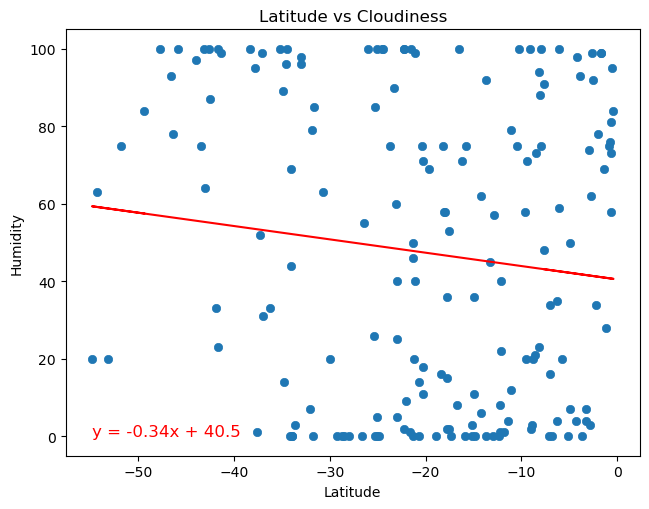

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and cloudiness based on the above charts. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no affect on cloudiness. 

The scatter points show that the data is too spread it to have any reliable correlation between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06085512373955038


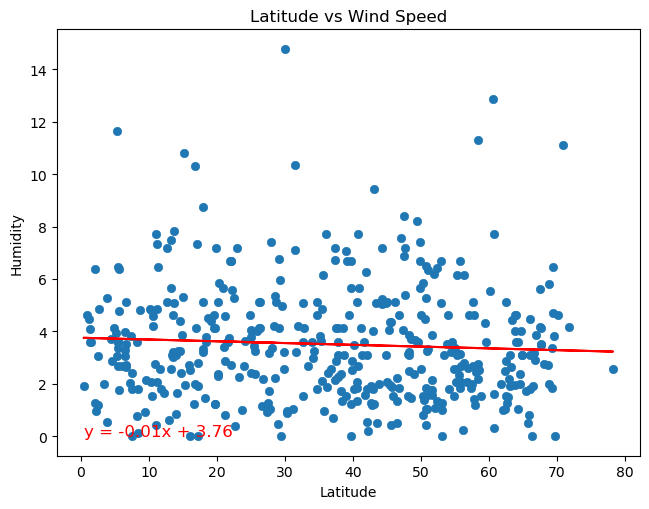

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Wind Speed")
plt.show()

The r-value is: -0.16332116841521904


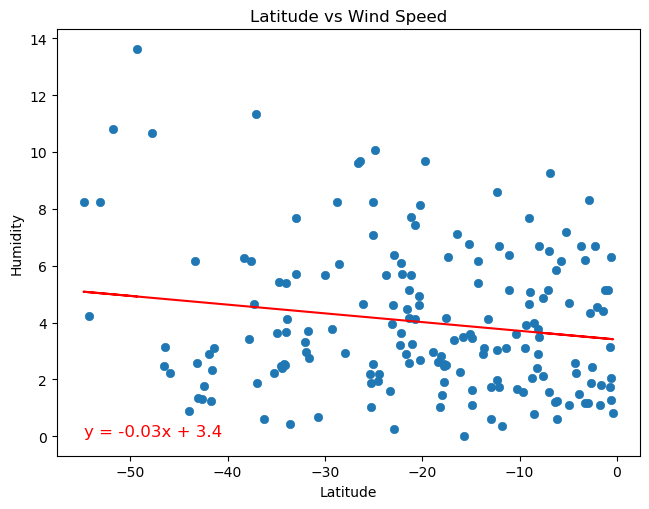

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Incorporating other graph properities
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

There's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.

The scatter points show that the data is too spread it to have any reliable correlation between latitude and wind speed
